In [1]:
%cd loqui-refactor
! git checkout test-model-single-video
! git pull origin test-model-single-video

!pip install -r requirements.txt

/tf/loqui-refactor
Already on 'test-model-single-video'
Your branch is up to date with 'origin/test-model-single-video'.
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (3/3), 1.14 KiB | 1.14 MiB/s, done.
From https://github.com/aviadshimoni/learn-an-effective-lip-reading-model-without-pains
 * branch            test-model-single-video -> FETCH_HEAD
   cb0535b..402660b  test-model-single-video -> origin/test-model-single-video
Updating cb0535b..402660b
Fast-forward
 label_sorted.txt       | 242 ++++++++++++++++++++++++++++++++++++++++++++++++-
 scripts/prepare_lrw.py |   2 +-
 2 files changed, 242 insertions(+), 2 deletions(-)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [66]:
!cat requirements.txt

torch >= 1.3.0
numpy >= 1.16.4
opencv-python >= 4.1.0
PyTurboJPEG
matplotlib~=3.7.1Requirement already satisfied: matplotlib in /usr/local/lib/python3.8/dist-packages (3.7.1)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
import torch
import cv2
import numpy as np
from utils.augmenter import center_crop

ModuleNotFoundError: No module named 'utils.augmenter'

In [5]:
def preprocess_frames(frames):
    # Convert frames to numpy arrays
    frames = [np.array(frame, dtype=np.uint8) for frame in frames]

    # Resize the frames
    resized_frames = [cv2.resize(frame, input_shape) for frame in frames]

    # Convert frames to grayscale
    grayscale_frames = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in resized_frames]

    # Normalize the frames
    normalized_frames = [(frame / 255.0).astype(np.float32) for frame in grayscale_frames]

    # Stack frames to create a tensor with shape [num_frames, height, width]
    tensor_frames = np.stack(normalized_frames)

    # Add a channel dimension to the tensor
    tensor_frames = np.expand_dims(tensor_frames, axis=1)

    # Convert frames to tensor
    tensor_frames = torch.tensor(tensor_frames)

    return tensor_frames


In [35]:

jpeg = TurboJPEG()

def extract_opencv(file_name: str) -> list:
    """
    Gets a path to a video file and tries to extract the ROI from it.
    :param file_name: Path to the video file.
    :return: ROI of the given video file.
    """

    video = []
    cap = cv2.VideoCapture(file_name)

    while cap.isOpened():
        ret, frame = cap.read()  # BGR
        if ret:
            roi = frame[115:211, 79:175]
            video.append(roi)
        else:
            break
    cap.release()

    return video

In [3]:
def plot_frames(frames_to_plot):
    num_frames = frames_to_plot.shape[0]
    for i in range(num_frames):
        frame = numpy_frames[i]  # Extract the frame
        if frame.ndim == 3:  # If the frame is 3D, reshape it to 2D
            frame = frame.squeeze()
        plt.imshow(frame, cmap='gray')
        plt.axis('off')
        plt.show()

In [2]:
%cd learn-an-effective-lip-reading-model-without-pains
!git pull origin master

/tf/learn-an-effective-lip-reading-model-without-pains
From https://github.com/VIPL-Audio-Visual-Speech-Understanding/learn-an-effective-lip-reading-model-without-pains
 * branch            master     -> FETCH_HEAD
Already up to date.


In [7]:
def load_missing(model, pretrained_dict):
    model_dict = model.state_dict()
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict.keys() and v.size() == model_dict[k].size()}                
    missed_params = [k for k, v in model_dict.items() if not k in pretrained_dict.keys()]
    
    print('loaded params/tot params:{}/{}'.format(len(pretrained_dict),len(model_dict)))
    print('miss matched params:',missed_params)
    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)
    return model

In [8]:
class args_to_send():
    n_class = 500
    se = False
    border = False


In [23]:
%matplotlib inline
!ls
!pwd

LSR.py	   __pycache__	label_sorted.txt	   main_visual.py  scripts
README.md  checkpoints	lrw_roi_npy_gray_pkl_jpeg  model	   utils
/tf/learn-an-effective-lip-reading-model-without-pains


loaded params/tot params:151/151
miss matched params: []


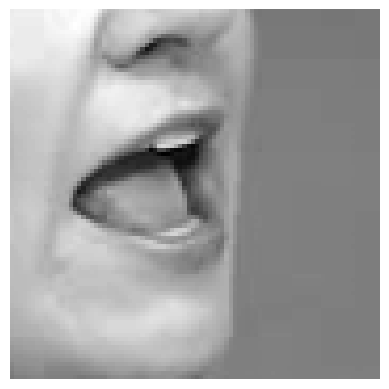

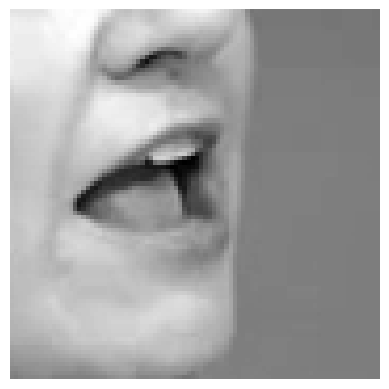

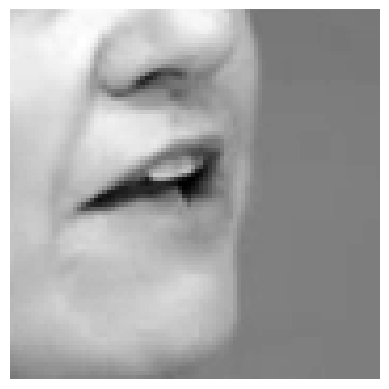

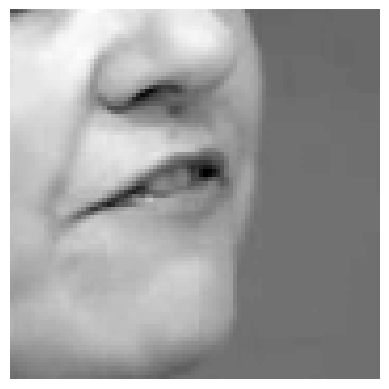

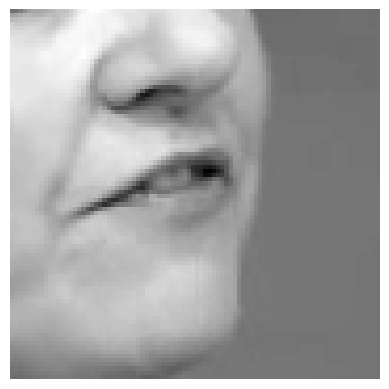

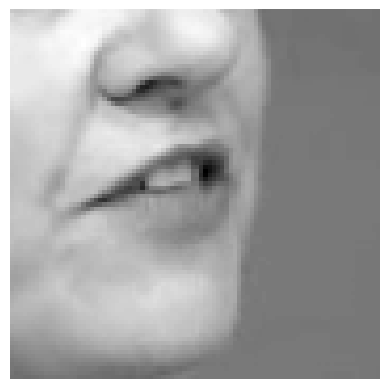

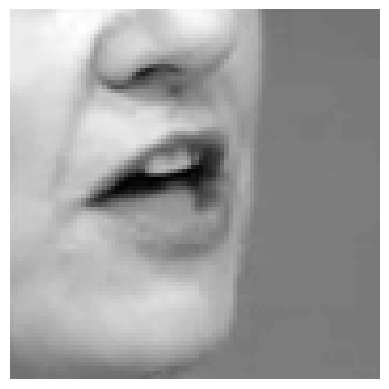

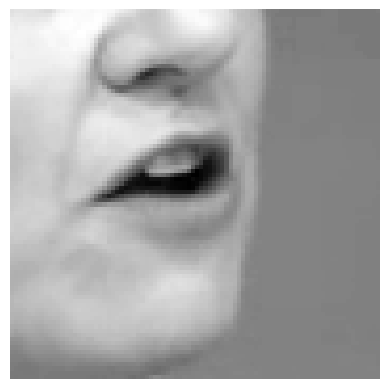

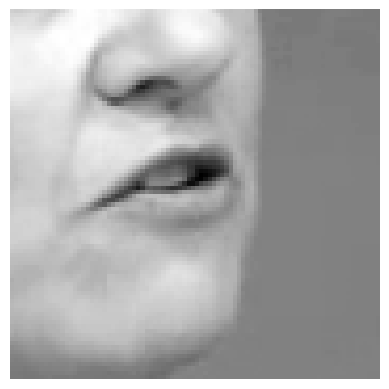

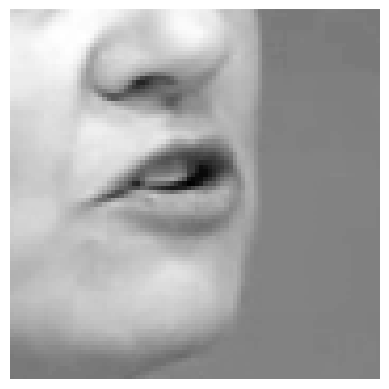

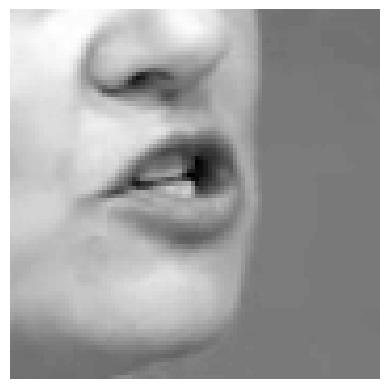

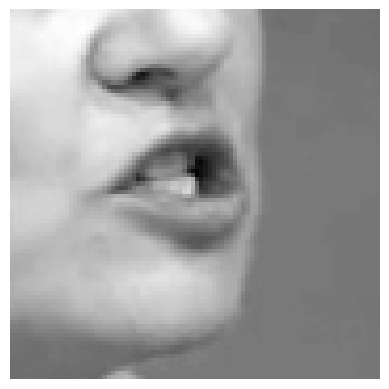

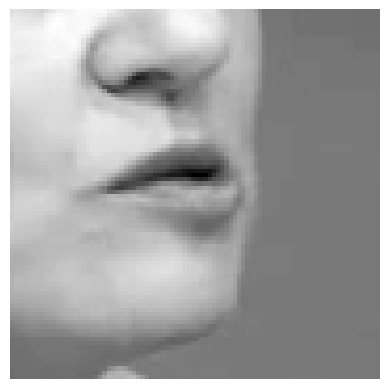

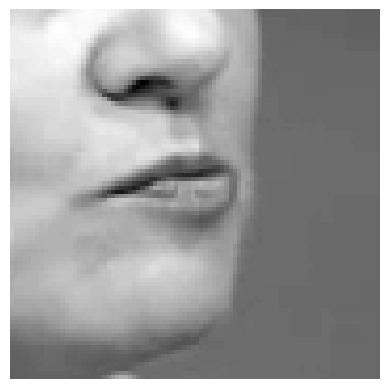

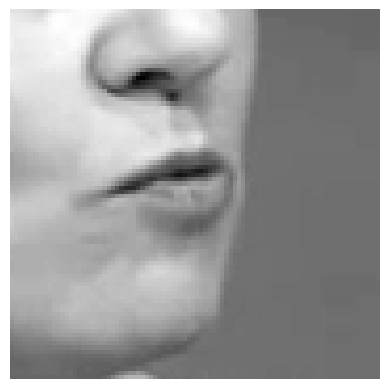

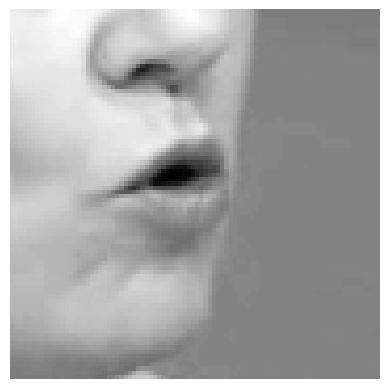

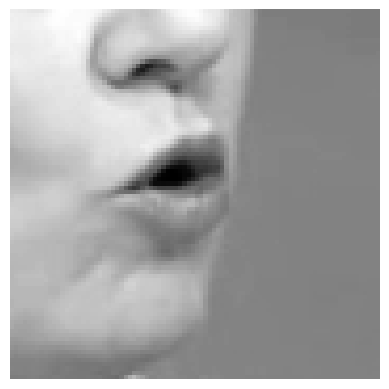

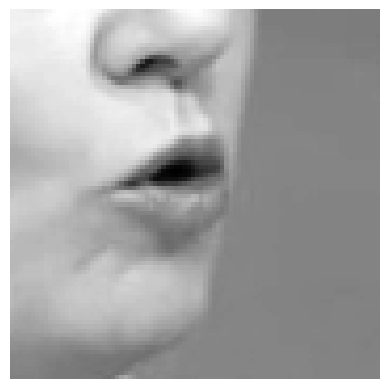

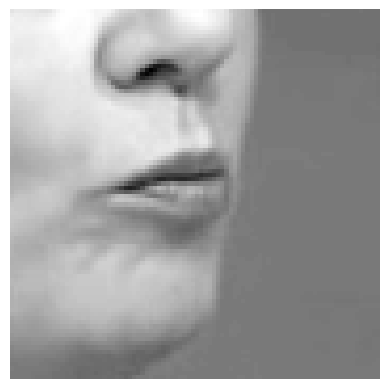

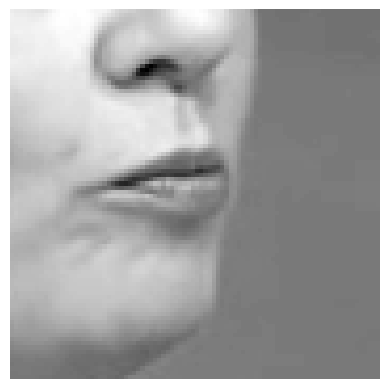

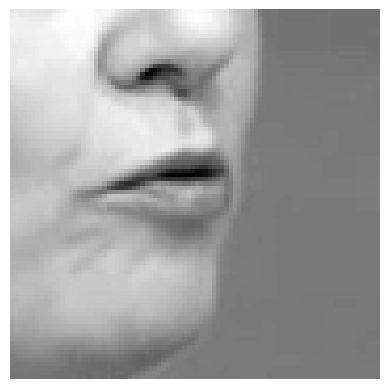

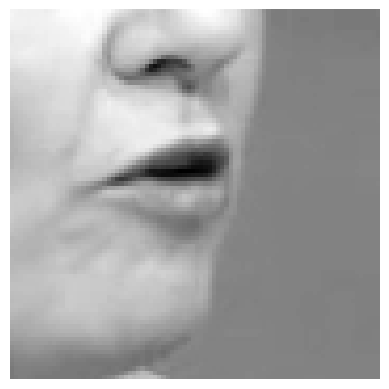

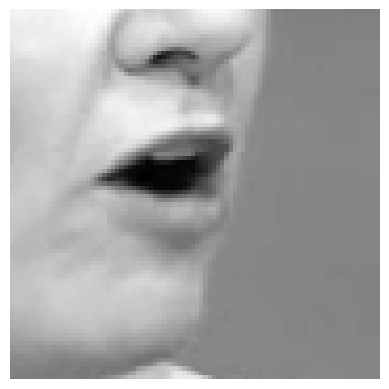

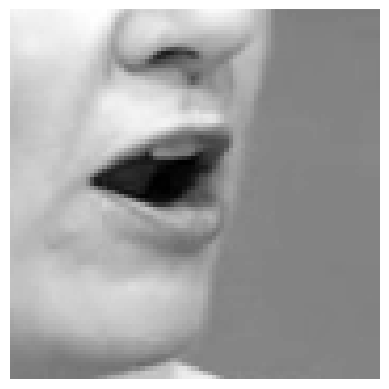

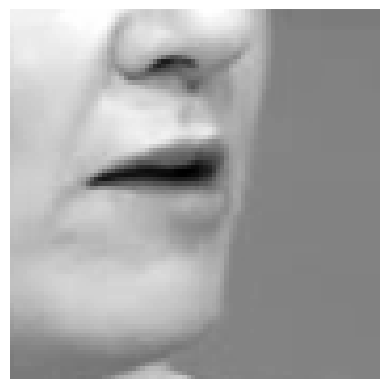

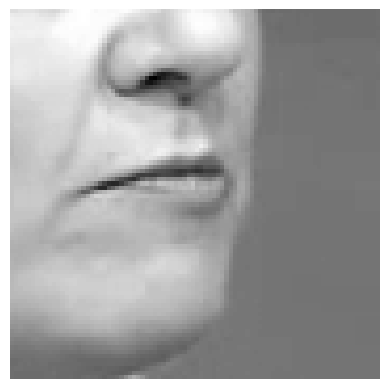

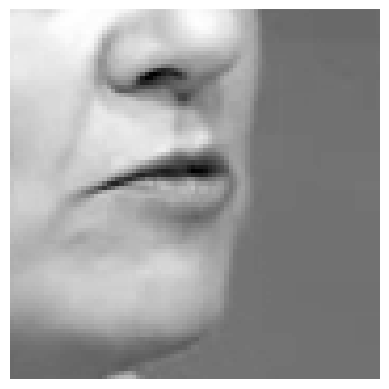

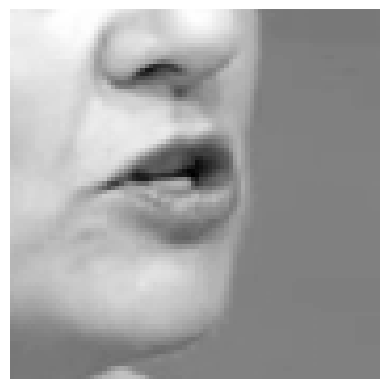

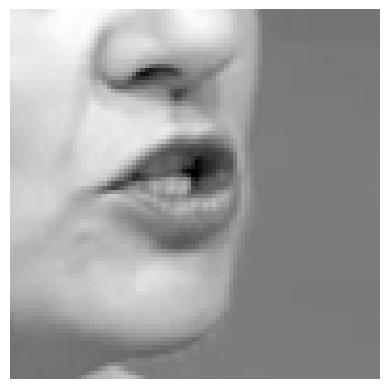

predictions: tensor([[ 5.7741e+00,  1.2557e+00, -1.3770e+00, -4.0407e+00, -2.2020e+00,
         -3.8916e+00, -2.7327e+00, -1.9869e+00, -2.5622e+00, -2.2900e+00,
         -2.8992e+00, -7.9050e-01, -1.5010e+00,  1.7417e-01, -3.0026e+00,
         -5.6146e+00, -8.0804e-01, -2.4007e+00, -4.3593e+00, -5.2749e+00,
          4.5414e+00, -2.9568e-01,  2.8705e+00, -7.6559e-01, -2.6652e-01,
         -5.4637e-01,  4.7058e+00,  7.9560e+00,  4.3003e+00, -3.8137e+00,
          2.3532e+00, -3.1852e+00, -1.1038e+00, -4.2020e+00,  2.4677e-01,
         -3.9221e+00, -2.5721e+00, -2.8094e+00,  2.1941e+00, -1.0163e+00,
         -3.8000e+00, -2.3150e-02, -3.9137e+00,  1.5053e+00,  6.1896e+00,
         -1.8609e-01, -4.6525e-01, -2.8893e+00,  7.1000e-01, -3.8536e+00,
         -1.1060e+00, -6.6765e-01, -2.1137e+00, -4.0096e-02,  4.3852e+00,
          2.5369e+00,  4.2502e+00, -2.9630e+00, -1.9274e-01,  6.9153e+00,
         -1.8634e-01,  3.8497e+00, -9.9048e-01, -4.7184e+00, -4.9887e+00,
          2.5538e+00,  4.

In [48]:
import cv2
from model.model import VideoModel
import torchvision.transforms as transforms
from turbojpeg import TurboJPEG
import matplotlib.pyplot as plt


# Define the desired input shape for the video model
input_shape = (88, 88)  # Adjust the dimensions according to the model's requirements


video_model = VideoModel(args_to_send)
weight = torch.load("/tf/weights/lrw-cosine-lr-acc-0.85080.pt", map_location=torch.device('cpu'))
load_missing(video_model, weight.get('video_model'))
video_model.eval()

# Replace 'filename.mp4' with the path to your video file
filename = '/tf/single-videos/SMALL_00001.mp4'

# Get the video frames
frames = extract_opencv(filename)

# Preprocess the frames
frames = preprocess_frames(frames)

# Access the preprocessed frames tensor
tensor_frames = frames.squeeze(0)

# Convert the tensor frames to numpy array
numpy_frames = tensor_frames.numpy()

plot_frames(numpy_frames)


# Pass the frames through the model
with torch.no_grad():
    frames = frames.unsqueeze(0)
    predictions = video_model(frames)
    print(f"predictions: {predictions}")
# Get the predicted label
predicted_label = torch.argmax(predictions)
print(predicted_label)

predicted_label = predicted_label.item()

# Print the predicted label
print(f'Predicted label: {predicted_label}')

In [ ]:
(1000, 1)